<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import load_model
%matplotlib inline

## Step 1: Data Loading

In [2]:
# Setting variables for each directory train, test, validation
base_dir = '/Users/dominiclee/Library/CloudStorage/OneDrive-NgeeAnnPolytechnic/Polytechnic/Year 2 Semester 1/DL/Asg 1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
img_size = 100

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 100 by 100
        batch_size=32,
        target_size=(img_size, img_size),
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Step 2:  Develop the Image Classification Models

### Model #1

In [12]:
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape=(img_size,img_size,3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch=7500/32, #train_sample_size/data_batch_size
      epochs=120,
      validation_data=validation_generator,
      validation_steps=2000/32)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/120
234/234 [==============================] - 102s 434ms/step - loss: 2.8160 - acc: 0.1347 - val_loss: 2.3342 - val_acc: 0.1940
Epoch 2/120
234/234 [==============================] - 107s 456ms/step - loss: 2.2928 - acc: 0.1829 - val_loss: 2.1692 - val_acc: 0.2295
Epoch 3/120
234/234 [==============================] - 121s 518ms/step - loss: 2.1849 - acc: 0.2111 - val_loss: 2.0510 - val_acc: 0.2695
Epoch 4/120
234/234 [==============================] - 120s 513ms/step - loss: 2.0982 - acc: 0.2563 - val_loss: 1.9600 - val_acc: 0.2995
Epoch 5/120
234/234 [==============================] - 111s 475ms/step - loss: 2.0105 - acc: 0.2760 - val_loss: 1.9661 - val_acc: 0.2950
Epoch 6/120
234/234 [==============================] - 112s 475ms/step - loss: 1.9500 - acc: 0.3061 - val_loss: 1.8119 - val_acc: 0.3680
Epoch 7/120
234/234 [==============================] - 110s 469ms/step - loss: 1.8997 - acc: 0.3319 - val_loss: 1.7960 - val_acc: 0.3545
Epoch 8/120
234/234 [====================

In [5]:
# Save the Model
model.save('food_model_1.h5')

NameError: name 'model' is not defined

### Model #2

In [ ]:
from tensorflow.keras.applications import VGG16

img_size = 100
pre_train = VGG16(input_shape=(img_size, img_size, 3), include_top=False, weights="imagenet")
pre_train.trainable = True

set_trainable = False
for layer in pre_train.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model2 = Sequential()
model2.add(pre_train)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation="softmax"))
# kernel_regularizer=regularizers.L2(0.01)
model2.summary()

model2.compile(optimizer=optimizers.Adam(0.0003),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(train_generator,
                    epochs=30,
                    batch_size=32,
                    steps_per_epoch = 7500/32,
                    validation_data=validation_generator,
                    validation_steps=2000/32)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                294976    
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 256)              

KeyboardInterrupt: 

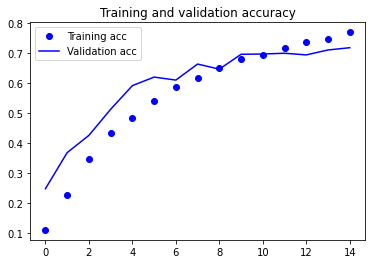

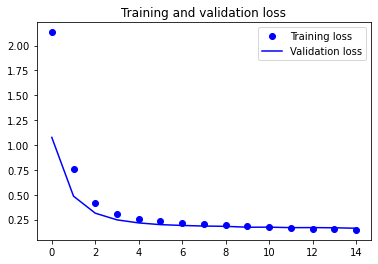

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model2.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [385]:
# Model #1
model1 = keras.models.load_model('food_model_1.h5')
model1.evaluate()



In [386]:
# Model #2
model2 = keras.models.load_model('food_model_2.h5')




In [387]:
# Save the best model


model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [388]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [389]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

FileNotFoundError: [Errno 2] No such file or directory: '??.txt'

In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)